In [43]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import f1_score
#gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('./data/a2.csv')

In [3]:
df.shape

(10999, 6)

In [4]:
df.head()

,0.58,0.33,0.05,0.34,0.04,1
0,0.68,0.59,0.73,0.87,0.32,1
1,0.75,0.74,0.56,0.06,0.86,1
2,0.55,0.47,0.85,0.12,0.03,0
3,0.67,0.72,0.53,0.56,0.77,0
4,0.83,0.65,0.73,0.51,0.17,1


In [5]:
#column '1' is the label we are predicting.
#classification task since binary.

df.isnull().sum()

0.58    0
0.33    0
0.05    0
0.34    0
0.04    0
1       0
dtype: int64

In [6]:
selected_features = ['0.58','0.33','0.05','0.34','0.04']

X = df[selected_features]

y = df['1']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#scaling using sklearn StandardScaler. (caused an increase in f1 score of abt 8)


In [7]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.0909, random_state=45)

print(X_train.shape, X_test.shape)



(9999, 5) (1000, 5)


In [8]:
#logistic regression for classification to start

model = LogisticRegression()

model.fit(X=X_train,y=y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_test)


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56       479
           1       0.61      0.73      0.67       521

    accuracy                           0.62      1000
   macro avg       0.62      0.61      0.61      1000
weighted avg       0.62      0.62      0.61      1000



Text(70.72222222222221, 0.5, 'Actual')

<Figure size 800x800 with 0 Axes>

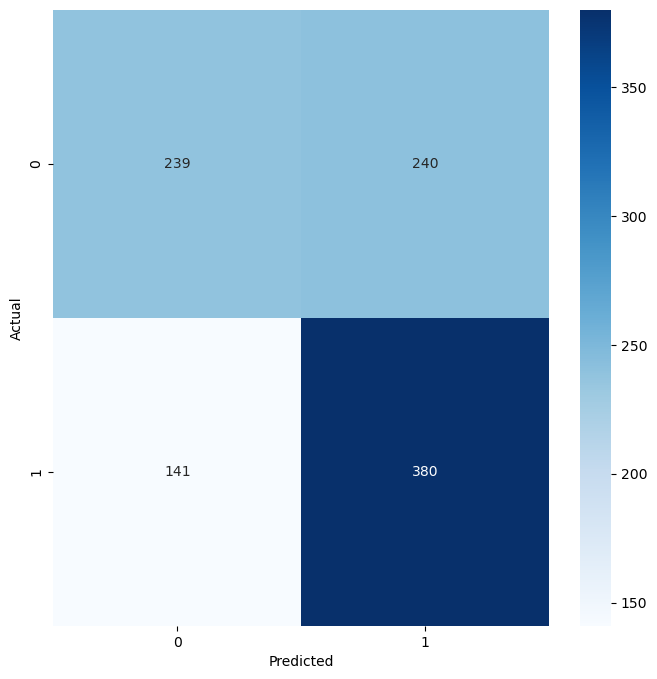

In [11]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,8))
confusion_mat = confusion_matrix(y_test, y_pred)

confusion_mat = confusion_mat.round(2)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')


plt.xlabel('Predicted')
plt.ylabel('Actual')


```
TP: 380
FP: 240
TN: 239
FN: 141

```

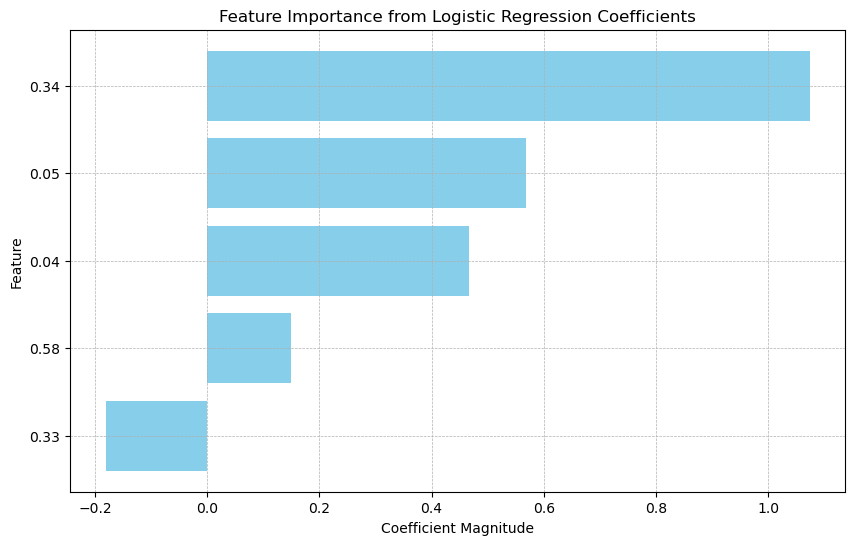

In [12]:

# Extract coefficients
coefs = model.coef_[0]
features = X.columns

# Create a DataFrame for coefficients and features
coef_df = pd.DataFrame({'features': features, 'coefficients': coefs})
coef_df = coef_df.sort_values(by='coefficients')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['features'], coef_df['coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

```
.058 is the least significant, while 0.34 is the most significant. Then again, this isnt a real dataset so I do not believe we are allowed to exclude.
```

In [15]:
#now can start another model, or fine-tune above

#decision tree

# Import the trees from sklearn
from sklearn import tree
# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 





In [34]:
model_2 = DecisionTreeClassifier(max_depth=13)

model_2.fit(X_train,y_train)



DecisionTreeClassifier(max_depth=13)

In [35]:
y_pred_2 = model_2.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       479
           1       0.82      0.79      0.80       521

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



Text(70.72222222222221, 0.5, 'Actual')

<Figure size 800x800 with 0 Axes>

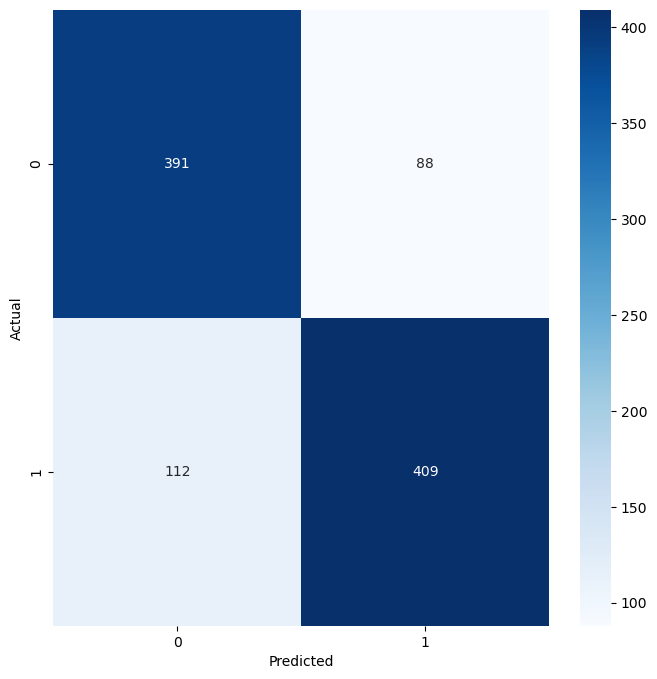

In [36]:
print(classification_report(y_test, y_pred_2))
fig = plt.figure(figsize=(8,8))
confusion_mat = confusion_matrix(y_test, y_pred_2)

confusion_mat = confusion_mat.round(2)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_2).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')


plt.xlabel('Predicted')
plt.ylabel('Actual')


In [89]:
#decision tree needs fine-tuning
#max depth increases accuracy from .59 to .80 now.

params = { 
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'splitter': ['best', 'random'],  # Strategy used to choose the split at each node
    'max_depth': [None, 5, 10, 15, 13, 20],  # Maximum depth of the tree
    'max_features': ['sqrt', 'log2', None, 100000],  # Number of features to consider when looking for the best split
    'random_state': [45], 
}

In [90]:
grid_search_cv =  GridSearchCV(model_2, param_grid=params, scoring='accuracy')

In [91]:
grid_search_cv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=13,
                                              random_state=45),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 13, 20],
                         'max_features': ['sqrt', 'log2', None, 100000],
                         'random_state': [45], 'splitter': ['best', 'random']},
             scoring='accuracy')

In [92]:
print(grid_search_cv.best_estimator_)

#Our grid search found that the best paramaters to use are max_depth=13, and max_features=100000. Max features doesnt make too much sense.

DecisionTreeClassifier(criterion='entropy', max_depth=13, random_state=45)


In [93]:
model_2 = grid_search_cv.best_estimator_

# Now lets evaluate our model
y_pred = model_2.predict(X_test)

accuracy = accuracy_score(y_true=y_test,y_pred=y_pred_2,)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test,y_pred=y_pred_2)
print("Precision Score: %f" % precision,)

recall = recall_score(y_true=y_test,y_pred=y_pred_2)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test,y_pred=y_pred_2)
print('F1 Score: %f' % f1)


y_pred_proba = model_2.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)
print(classification_report(y_test, y_pred_2))

Accuracy Score: 0.800000
Precision Score: 0.822938
Recall Score: 0.785029
F1 Score: 0.803536
AUC Score: 0.818646
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       479
           1       0.82      0.79      0.80       521

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



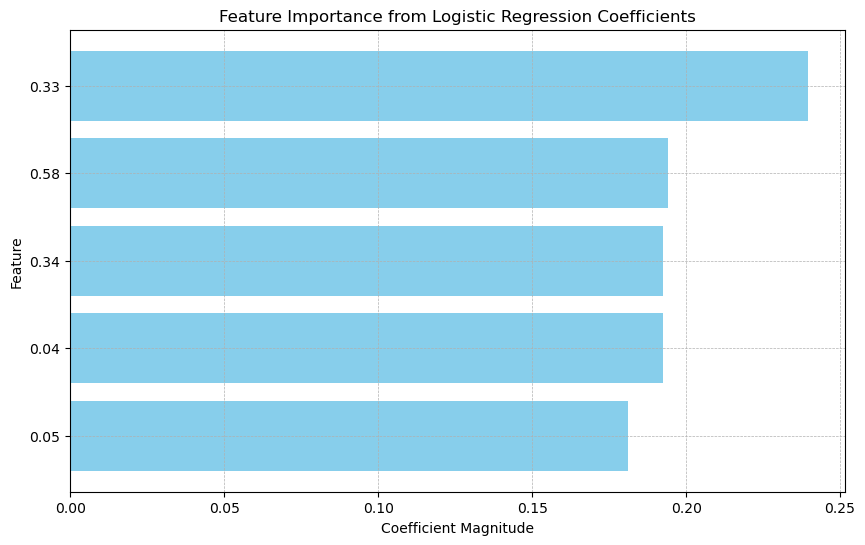

In [98]:

# Extract coefficients
coefs = model_2.feature_importances_
features = X.columns

# Create a DataFrame for coefficients and features
coef_df = pd.DataFrame({'features': features, 'coefficients': coefs})
coef_df = coef_df.sort_values(by='coefficients')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['features'], coef_df['coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

```
When using a Decision Tree, we find that .33 is the most important feature, while the rest are fairly similar

```

In [99]:
from sklearn.ensemble import RandomForestClassifier 

random_forest_md = RandomForestClassifier()

In [100]:
random_forest_md.fit(X_train,y_train)

RandomForestClassifier()

In [101]:
# Now lets evaluate our model
y_pred_3 = random_forest_md.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_3)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred_3)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred_3)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred_3)
print('F1 Score: %f' % f1)


# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = random_forest_md.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.884000
Precision Score: 0.890173
Recall Score: 0.886756
F1 Score: 0.888462
AUC Score: 0.954778


In [109]:
#Random forest has by bar been the best, .95 AUC score, .88 accuracy

#fine tuning

params = {
    'n_estimators': [25,50],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False], 
    'random_state': [45] 
}


random_forest_md = GridSearchCV(RandomForestClassifier(),param_grid=params, scoring='roc_auc', cv=5)

In [110]:
random_forest_md.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
print(random_forest_md.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
random_forest_md = random_forest_md.best_estimator_

# Now lets evaluate our model
y_pred_3 = random_forest_md.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_3)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred_3)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred_3)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred_3)
print('F1 Score: %f' % f1)


# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = random_forest_md.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)